# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path if more data is needed.

path = r'C:\Users\rubix\Downloads\Achievement 6\02 Data'

In [3]:
# Create DataFrame from csv file

df = pd.read_csv(os.path.join(path, 'Original Data', 'synthetic_coffee_health_10000.csv'), index_col = False)

# Checks and Cleaning

## Quick Checks setup

In [4]:
# Define what a quick check does

def quick_data_check(df, n_top_values=5):
    print("=== Shape ===")
    print(df.shape)
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    print("\n=== First 5 Rows ===")
    print(df.head())
    
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    print("\n=== Basic Stats (Numeric Columns) ===")
    print(df.describe())
    
    print("\n=== Extended Numeric Summary ===")
    print(df.select_dtypes(include='number').agg(['mean', 'median', 'min', 'max']))
    
    print("\n=== Constant Columns ===")
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    print(constant_cols if constant_cols else "None")
    
    print("\n=== Mixed Data Types Check ===")
    for column in df.columns:
        inferred_type = pd.api.types.infer_dtype(df[column])
        print(f"Column '{column}': {inferred_type}")
        if inferred_type in ['mixed', 'mixed-integer']:
            print(f"  --> Column '{column}' has mixed data types.")  # Fixed indentation here
    
    print("\n=== Duplicate Row Counts ===")
    print(df.duplicated().value_counts())
    
    print("\n=== Top Values for Categorical Columns ===")
    for col in df.select_dtypes(include='object'):
        print(f"\nColumn: {col}")
        print(df[col].value_counts(dropna=False).head(n_top_values))
    
    print("\n=== Correlation Matrix (Numeric Only) ===")
    print(df.corr(numeric_only=True))

# Use quick_data_check(df) to call data

## Run quick_data_check(df) and .head()

In [5]:
quick_data_check(df)

=== Shape ===
(10000, 16)

=== Data Types ===
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

=== First 5 Rows ===
   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3  

In [6]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## Summary of quick_data_check

10,000 rows, 16 columns

Data Types make sense (might need to change Health_Issues for better analysis options).

Missing values within Health_Issues (are they actually missing or should they be something else?).

The max is pretty far away from a standard deviation from the third quartile, but I think that's fairly normal. May want to see how many people are that much older.

Similar stories for max coffee and caffeine intake (I'd guess they're related since I don't see a decaf option).

Maybe a couple outliers in Sleep_Hours; check those later.

BMI, Heart_Rate (I believe that's resting heart rate), and Physical_Activity_Hours have some outliers to check too.

No mixed data (yay!)

No duplicates either!

Interesting top 5 Countries (Canada, India, Norway, China, and UK).

Curious about the "other" occupations. I assume the dropdown they used to select didn't cover enough jobs to be more precise.

Everything else looks pretty normal.

## Missing Values

In [7]:
# Investigate missing values

df['Health_Issues'].value_counts(dropna=False)

Health_Issues
NaN         5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

In [8]:
# I'm guessing that the missing values are wrongly attributed to having no medical issues instead of blank.
# Let's change that here:

df = df.fillna('Zero')
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,None,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,None,Student,0,0


In [9]:
(df.isnull().sum())

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

## Change Types

In [10]:
# Smoking and Alcohol Consumption are binary values and can be changed to boolean instead of int64

df['Smoking'] = df['Smoking'].astype('boolean')
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].astype('boolean')

In [11]:
df.dtypes

ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                    boolean
Alcohol_Consumption        boolean
dtype: object

## Visualize the Correlation Matrix

NOTE!! It may be beneficial to change the health issues to something numeric to add to this chart later.

In [12]:
heat_df = df.corr(numeric_only=True)

<Axes: >

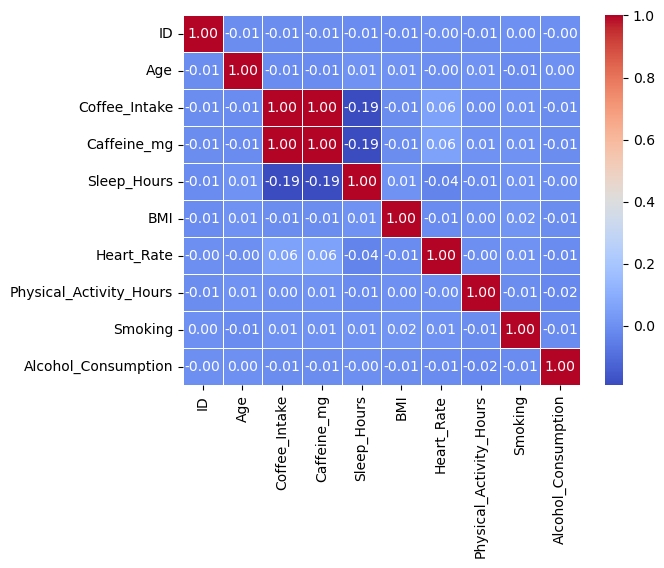

In [13]:
sns.heatmap(heat_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [17]:
df.to_csv(os.path.join(path, 'Prepared Data', 'Coffee_Health_Cleaned.csv'), index=False)